### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow import keras


## DATA

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualize Examples

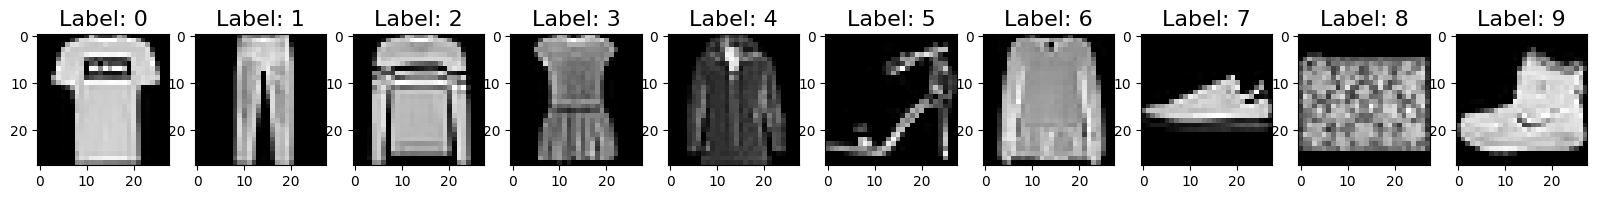

In [ ]:
num_classes = 10
f ,ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample , cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),-1)
x_test_flattened = x_test.reshape(len(x_test),-1)

In [ ]:

mean = x_train.mean()
std = x_train.std()

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq = 1)


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4962 - loss: 1.2980
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8277 - loss: 0.5233
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8589 - loss: 0.4224
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8683 - loss: 0.3905
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8800 - loss: 0.3562
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8830 - loss: 0.3382
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8885 - loss: 0.3256
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8901 - loss: 0.3158
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8947 - loss: 0.3026
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8984 - loss: 0.2940
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9031 - loss: 0.2795
Epoch 12/20
1875/1875 ━━━━━━━━

In [46]:
y_pred = model.predict(x_test)
accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8829 - loss: 0.3727
